the reciprocal vector are:
b1= [ 8.60474570e-01 -5.26888714e-17 -5.26888714e-17]
b2= [ 0.00000000e+00  1.06984255e+00 -6.55089628e-17]
b3= [0.         0.         1.61854336]
this is an orthorhombic system


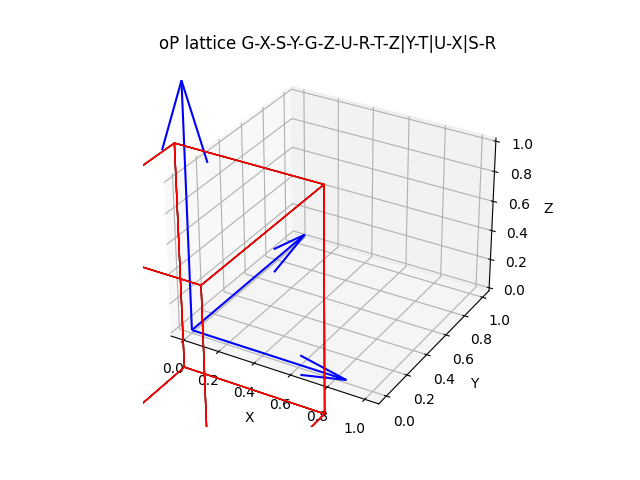

In [1]:
#计算仅针对单纯格子P，单斜m：仅需考虑截面形状  三斜：4种情况进行讨论，出现额外情况再进行讨论  直方/立方：太简单了

import os,sys,math,cmath
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from mpl_toolkits import mplot3d
from collections import Counter
from mpl_toolkits.mplot3d.art3d import Poly3DCollection

a = 7.302
b = 5.873
c = 3.882
alpha = 90  
beta = 90
gamma = 90
#alpha = 91.13
#beta = 112.55
#gamma = 92.43

G = (0,0,0)
#排序 （表述对应关系）
#两个原则：默认顺序a>b>c；在结构判定条件中对角度的大小的要求的情况下可以无视上一条；
  
#逆矢量的计算
Alpha = np.radians(alpha)
Beta = np.radians(beta)
Gamma = np.radians(gamma)

a1 = (a,0,0)
a2 = (b * np.cos(Gamma), b * np.sin(Gamma), 0)
a3 = (c * np.cos(Beta), c * ( np.cos(Alpha) - np.cos(Beta) * np.cos(Gamma)) / np.sin(Gamma), np.sqrt(np.sin(Gamma)**2-np.cos(Alpha)**2-np.cos(Beta)**2+2*np.cos(Alpha)*np.cos(Beta)*np.cos(Gamma))*c/np.sin(Gamma))

b1 = 2 * np.pi * np.cross(a2, a3) / np.dot(a1, np.cross(a2, a3))
b2 = 2 * np.pi * np.cross(a3, a1) / np.dot(a1, np.cross(a2, a3))
b3 = 2 * np.pi * np.cross(a1, a2) / np.dot(a1, np.cross(a2, a3))

RV = np.array([b1,b2,b3])
x = RV[:,0]
y = RV[:,1]
z = RV[:,2]

print("the reciprocal vector are:")
print("b1=",b1)
print("b2=",b2)
print("b3=",b3)

%matplotlib widget

if alpha == beta == gamma == 90 :
    print("this is an orthorhombic system")
    #black line FBZ 边界线
    A1 = 0.5 * (b1+b2-b3)
    A2 = 0.5 * (-b1+b2-b3)
    A3 = 0.5 * (-b1-b2-b3)
    A4 = 0.5 * (b1-b2-b3)
    B1 = 0.5 * (b1+b2+b3)
    B2 = 0.5 * (-b1+b2+b3)
    B3 = 0.5 * (-b1-b2+b3)
    B4 = 0.5 * (b1-b2+b3)
    point_FBZ = [A1,A2,A3,A4,B1,B2,B3,B4]
    vertices_FBZ = [[point_FBZ[0],point_FBZ[1],point_FBZ[2],point_FBZ[3]],
                [point_FBZ[4],point_FBZ[5],point_FBZ[6],point_FBZ[7]],
                [point_FBZ[0],point_FBZ[1],point_FBZ[5],point_FBZ[4]],
                [point_FBZ[1],point_FBZ[2],point_FBZ[6],point_FBZ[5]],
                [point_FBZ[2],point_FBZ[3],point_FBZ[7],point_FBZ[6]],
                [point_FBZ[3],point_FBZ[0],point_FBZ[4],point_FBZ[7]],]
    face_FBZ = Poly3DCollection(vertices_FBZ, edgecolors='black', linewidths=1, alpha=0)
    #red line  k-path     bule line b1 b2 b3
    X = 0.5*b1
    S = 0.5*(b1+b2)
    Y = 0.5*b2
    Z = 0.5*b3
    U = 0.5*(b1+b3)
    R = B1
    T = 0.5*(b2+b3)
    point_kpath = [G,X,S,Y,Z,U,R,T]
    vertices_kpath = [[point_FBZ[0],point_FBZ[1],point_FBZ[2],point_FBZ[3]],
                [point_FBZ[4],point_FBZ[5],point_FBZ[6],point_FBZ[7]],
                [point_FBZ[0],point_FBZ[1],point_FBZ[5],point_FBZ[4]],
                [point_FBZ[1],point_FBZ[2],point_FBZ[6],point_FBZ[5]],
                [point_FBZ[2],point_FBZ[3],point_FBZ[7],point_FBZ[6]],
                [point_FBZ[3],point_FBZ[0],point_FBZ[4],point_FBZ[7]],]
    face_kpath = Poly3DCollection(vertices_kpath, edgecolors='red', linewidths=1, alpha=0)
    
    %matplotlib widget
    fig = plt.figure()
    ax = plt.axes(projection='3d')
    ax.set_title('oP lattice G-X-S-Y-G-Z-U-R-T-Z|Y-T|U-X|S-R')
    ax.add_collection3d(face_FBZ)
    ax.add_collection3d(face_kpath)
    ax.quiver(0, 0, 0, x, y, z, color='blue')
    #ax.scatter(point_kpath)


    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.set_zlabel('Z')
    plt.show()



elif (alpha == beta == 90) or (alpha == gamma ==90) or (beta == gamma ==90) :
    print("this is a monoclinic system")



else :
    print("this is a triclinic system")
